<H1> Attrition et Anime </H1>


# 1 - Attrition

Le [taux d'attrition ](https://www.definitions-marketing.com/definition/Taux-d-attrition/) représente le pourcentage de clients perdus, quelle qu'en soit la raison, pour une durée définie. 
Prédire l'attrition permet de (i) tenter d'y remédier par un marketing ciblé, (ii) comprendre les ressorts du départ de clients et tenter de corriger ces causes.. 

On examinera ici ce problème dans le cas d'un service de cartes bancaires, où il s'agit de prédire quels clients vont résilier leur service. Il s'agit donc d'un problème de <u>discrimination</u> dans lequel nous allons devoir prédire la classe de "Attrition".

**Description**

- Client: Unique identifier for the customer holding the account
- Attrition: Internal event (customer activity) variable -Existing customer/Attrited customer
- Customer_Age: Demographic variable - Customer's Age in Years
- Gender: Demographic variable - M=Male, F=Female
- Dependent_count: Demographic variable - Number of dependents
- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
- Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio

# 2 - Anime

On s'intéresse ici à comprendre quels sont les ingrédients qui conduisent au succès d'un "anime". Les données sont issues du site https://www.anime-planet.com. 
On dispose d'un ensemble de données sur les anime, et l'objectif est de construire un modèle permettant de prédire le score, variable *rating*. On utilisera donc une régression linéaire, pour laquelle on va analyser et préparer les données, sélectionner les variables pertinentes, mesurer les performances. 

**Description**
- title: title of anime
- mediaType: format of publication
- eps: number of episodes (movies are considered 1 episode)
- duration: duration of episode
- ongoing: whether it is ongoing
- startYr: year that airing started
- finishYr: year that airing finished
- sznOfRelease: season of release (Winter, Spring, Fall)
- description: synopsis of plot
- studios: studios responsible for creation
- tags: tags, genres, etc.
- contentWarn: content warning
- watched: number of users that completed it
- watching: number of users that are watching it
- wantWatch: number of users that want to watch it
- dropped: number of users that dropped it before completion
- rating: average user rating


## Exercice 1 - Attrition  :

1. Dans un premier temps je vais charger le dataset et visualiser les données ainsi que les types des données :

    - Je vois qu'il y a un colonne "Client" qui ne sert à rien, à enlever.
    - La variable à prédire "Attrition" doit être mapper.
    - La variable "Genre" est aussi à mapper.
    - Je vais encoder en one-hot toutes les données catégorielles.


2. Je Vais vérifier s'il y a des données manquantes :

    - Il n'y a absolument aucune données manquantes dans ce dataset, ce qui est assez rare.


3. Je vais afficher des graphiques représentant chaque données numériques en fonction de la target "Attrition" pour voir s'il y a des données aberrante et voir un début de corrélation :

    - Je vois directement qu'il n'y a aucune valeurs aberrante.
    - Je commence à apercevoir les corrélation entre feature et target mais ce n'est pas suffisant.
    

4. Je vais donc afficher une heatmap de toutes les corrélation pour y voir plus clair :

    - Les variables qui semblent pouvoir expliquer l'attrition sont : ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'].
       
       
5. Je vais désormais coder un modèle qui utilisera deux modèles de discrimination différentes à savoir la régression logistique et le multinomialNB et affichera les scores des ces dernier ainsi que les rapports de classification. J'utilise mon modèle avec comme features les variables explicatives définis précédemment ainsi quel les variables encodées :

    - La régression logistique à l'air de déjà bien marcher, elle affiche un bon score même si la valeur de recall sur les valeurs d'attrition pourrait être meilleure.
    - Le multinomialNB marche quant à lui un peu moins.
    

6. Je décide de voir si on peut augmenter le sens des données, pour cela je vais afficher les corrélations des données avec l'attrition après avoir reçue un log, une racine carrée ainsi qu'une racine cubique :

    - Je vois qu'il y plein de données dont la corrélation pourrait augmenter avec une simple opération numérique je vais donc les effectuer.



7. Je réutilise mon modèle avec les mêmes features dont celles qui viennent d'être modifier : 

    - Il y a une nette amélioration des performances, la régression logistique s'améliore un petit peu.
    - Le multinomialNB a été énormément amélioré, surtout sur le score.
    - d'une manière générale mes modèles semblent mieux prédire une attrition négative que positive, je ne sais pas vraiment comment améliorer cela.
  
  
8. Je vais essayer de normaliser les données sur quelques variables qui me semblent pertinentes à savoir "Total_Trans_Ct" et "Total_Trans_Amt" :

    - la régression logistique ne change pas beaucoup. 
    - Le multinomialNB marche encore moins, j'en déduis que la normalisation s'applique mal à ces données.


9. Dans une optique de faire du feature engineering je vais essayer de croiser des données entres elles en les multipliant et en les divisant :

    - Il n'y a rien de vraiment prometteur.
    - J'essaye aussi une nouvelle feature mais elle n'apporte rien.

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('attrition.csv')
pd.set_option("display.max_columns", 21)
df1

,Client,Attrition,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client                    10127 non-null  int64  
 1   Attrition                 10127 non-null  object 
 2   Age                       10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
df1.drop('Client', axis = 1, inplace=True)

In [5]:
df1['Attrition'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [6]:
mapping_type = {
        'Existing Customer': 0,
        'Attrited Customer' : 1,
}

df1['Attrition']=df1['Attrition'].replace(mapping_type)
df1['Attrition'].unique()

array([0, 1], dtype=int64)

In [7]:
df1['Gender'].unique()

array(['M', 'F'], dtype=object)

In [8]:
mapping_type = {
        'M': 0,
        'F' : 1,
}

df1['Gender']=df1['Gender'].replace(mapping_type)
df1['Gender'].unique()

array([0, 1], dtype=int64)

In [9]:
from sklearn.preprocessing import OneHotEncoder

list_one_hot = ['Education_Level','Marital_Status','Income_Category','Card_Category']
encoder_OH = OneHotEncoder(handle_unknown='error',sparse=False)

fit_OH=encoder_OH.fit(df1[list_one_hot])
fit_data_OH=fit_OH.transform(df1[list_one_hot])

column_name_OH =fit_OH.get_feature_names(list_one_hot)
cols_OH = pd.DataFrame(fit_data_OH,columns=column_name_OH)
cols_OH.reset_index(drop=True, inplace=True)
cols_OH.nunique()

Education_Level_College           2
Education_Level_Doctorate         2
Education_Level_Graduate          2
Education_Level_High School       2
Education_Level_Post-Graduate     2
Education_Level_Uneducated        2
Education_Level_Unknown           2
Marital_Status_Divorced           2
Marital_Status_Married            2
Marital_Status_Single             2
Marital_Status_Unknown            2
Income_Category_$120K +           2
Income_Category_$40K - $60K       2
Income_Category_$60K - $80K       2
Income_Category_$80K - $120K      2
Income_Category_Less than $40K    2
Income_Category_Unknown           2
Card_Category_Blue                2
Card_Category_Gold                2
Card_Category_Platinum            2
Card_Category_Silver              2
dtype: int64

In [10]:
cols_OH

,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
df1

,Attrition,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [12]:
df1.isna().sum()

Attrition                   0
Age                         0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
lenlist = df1.columns.drop(['Education_Level','Marital_Status','Income_Category','Card_Category'])
lenlist


Index(['Attrition', 'Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

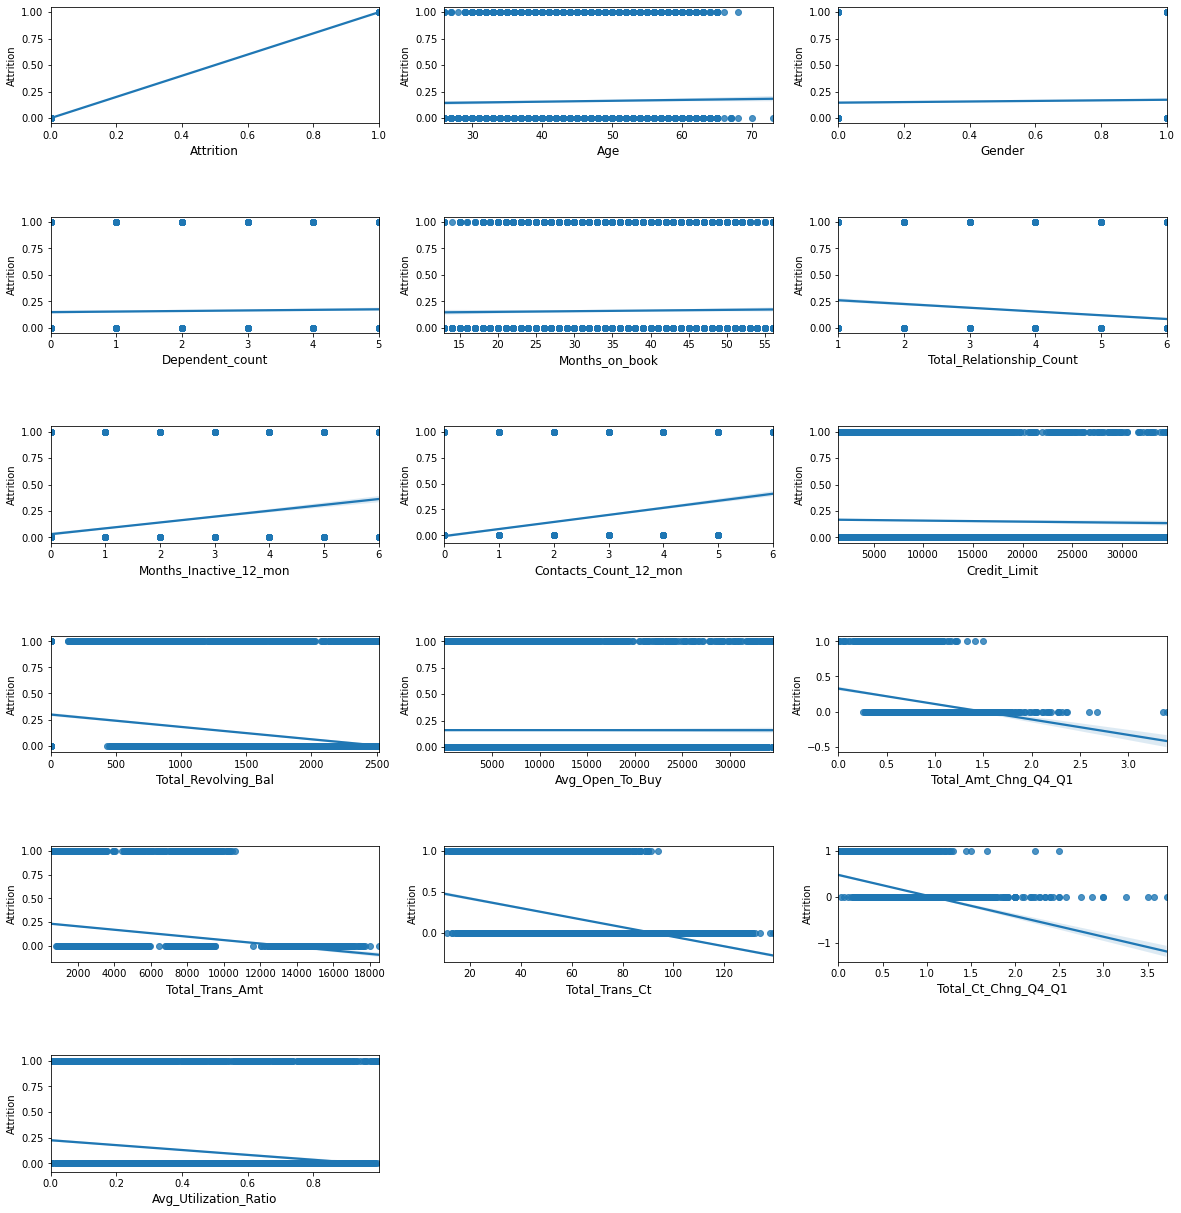

In [14]:
# On verifie qu'il n'y a pas de valeurs abérrantes

rowCnt = len(lenlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(20,60))
fig.subplots_adjust(hspace = .8)

for i in (lenlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="Attrition", data=df1)
    subCnt = subCnt + 1

plt.show()

<AxesSubplot:>

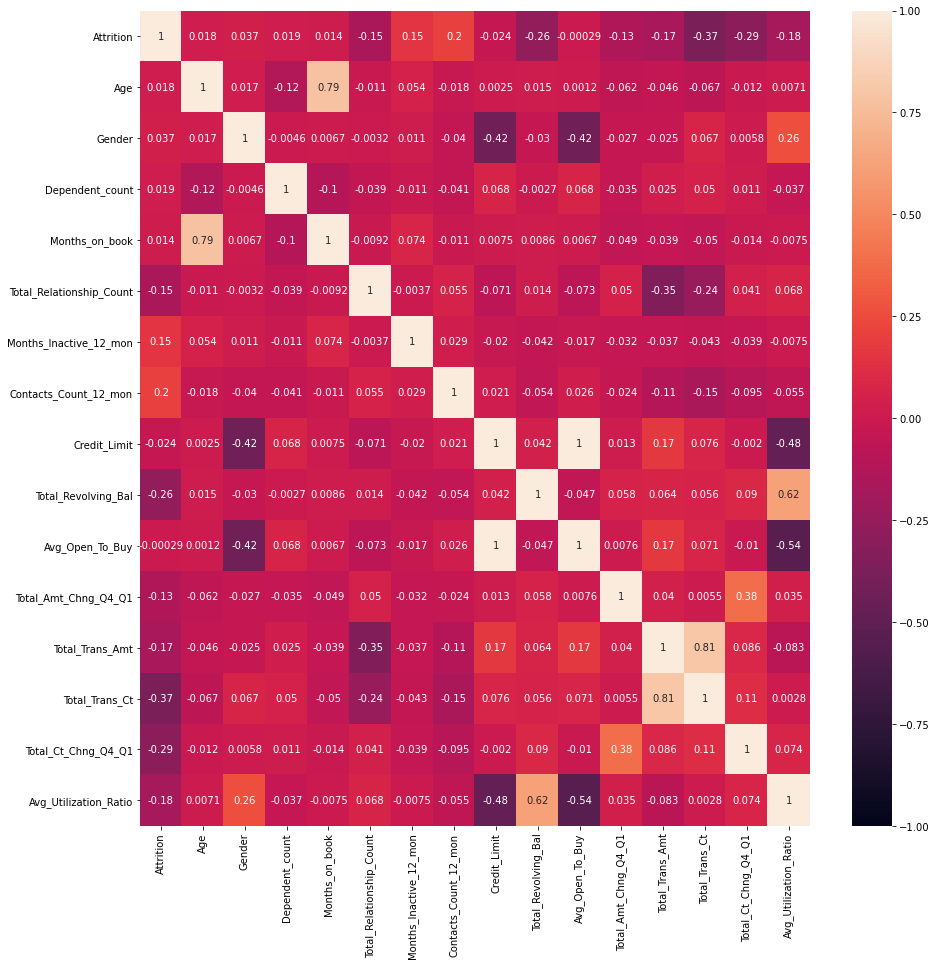

In [15]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df1.corr(),annot=True,vmin=-1, vmax=1,ax=ax)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

def model(x,y):
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=0)
    
    LR = LogisticRegression(max_iter=5000)
    LR.fit(xtrain,ytrain)
    print('score avec la regression logistique :')
    print(LR.score(xtest,ytest))
    print('')
    print('rapport de classification de la regression logistique')
    lab = df1['Attrition'].unique()
    print(classification_report(ytest, LR.predict(xtest), labels=lab))   
    print('')
    
    
    MNB = MultinomialNB()
    MNB.fit(xtrain,ytrain)
    print('score avec le multinomialNB :')
    print(MNB.score(xtest,ytest))
    print('')
    print('rapport de classification du multinomialNB')
    lab = df1['Attrition'].unique()
    print(classification_report(ytest, MNB.predict(xtest), labels=lab))
    print('')


In [17]:
xlist = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


x = pd.concat([df1[xlist],cols_OH],axis=1)
y = df1['Attrition']

model(x,y)

score avec la regression logistique :
0.9024486571879937

rapport de classification de la regression logistique
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2148
           1       0.73      0.57      0.64       384

    accuracy                           0.90      2532
   macro avg       0.83      0.76      0.79      2532
weighted avg       0.90      0.90      0.90      2532


score avec le multinomialNB :
0.6090047393364929

rapport de classification du multinomialNB
              precision    recall  f1-score   support

           0       0.90      0.61      0.72      2148
           1       0.22      0.62      0.32       384

    accuracy                           0.61      2532
   macro avg       0.56      0.61      0.52      2532
weighted avg       0.80      0.61      0.66      2532




In [18]:
for i in xlist:
    print(i)
    print(df1[i].corr(df1['Attrition']))
    print(np.log(df1[i]).corr(df1['Attrition']))
    print(((df1[i])**0.5).corr(df1['Attrition']))
    print(np.power(df1[i],1/3).corr(df1['Attrition']))
    print('')

Total_Relationship_Count
-0.15000522801913768
-0.15125532259020982
-0.15259284327225672
-0.15263701809023658

Months_Inactive_12_mon
0.15244880632692487
nan
0.15479530926474167
0.14695655951154327

Contacts_Count_12_mon
0.20449050998160462
nan
0.18614080076870376
0.16831286321032848

Total_Revolving_Bal
-0.26305288312920344
nan
-0.30864033236573746
-0.31692997471417234

Total_Amt_Chng_Q4_Q1
-0.1310628478144702
nan
-0.15223196367408837
-0.1603126969259321

Total_Trans_Amt
-0.16859838141007905
-0.2269898499065227
-0.19936151894151513
-0.20939724971566417

Total_Trans_Ct
-0.3714027011889276
-0.3705659300860552
-0.37493811062033033
-0.37439135026995707

Total_Ct_Chng_Q4_Q1
-0.29005400688089117
nan
-0.33468897413738236
-0.34543210587613926

Avg_Utilization_Ratio
-0.1784103315617469
nan
-0.246470762042986
-0.27676820231682076



D:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
df1['Total_Revolving_Bal'] = np.power(df1['Total_Revolving_Bal'],1/3)
df1['Total_Amt_Chng_Q4_Q1'] = np.power(df1['Total_Amt_Chng_Q4_Q1'],1/3)
df1['Total_Trans_Amt'] = np.log(df1['Total_Trans_Amt'])
df1['Total_Ct_Chng_Q4_Q1'] = np.power(df1['Total_Ct_Chng_Q4_Q1'],1/3)
df1['Avg_Utilization_Ratio'] = np.power(df1['Avg_Utilization_Ratio'],1/3)

In [20]:

x = pd.concat([df1[xlist],cols_OH],axis=1)
y = df1['Attrition']

model(x,y)

score avec la regression logistique :
0.9091627172195893

rapport de classification de la regression logistique
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2148
           1       0.73      0.63      0.68       384

    accuracy                           0.91      2532
   macro avg       0.83      0.79      0.81      2532
weighted avg       0.90      0.91      0.91      2532


score avec le multinomialNB :
0.8661137440758294

rapport de classification du multinomialNB
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2148
           1       0.57      0.50      0.53       384

    accuracy                           0.87      2532
   macro avg       0.74      0.72      0.73      2532
weighted avg       0.86      0.87      0.86      2532




In [21]:
cpy = df1.copy()

from sklearn import preprocessing

nlist = ['Total_Trans_Ct','Total_Trans_Amt']

normscaler = preprocessing.MinMaxScaler()
norm = normscaler.fit_transform(cpy[nlist])
scaled = pd.DataFrame(norm, columns=nlist)
cpy[nlist] = scaled


# J'ai essayé la standardisation mais cela fait buggé le modèle à cause des valeurs négative

In [22]:
x = pd.concat([cpy[xlist],cols_OH],axis=1)
y = cpy['Attrition']

model(x,y)

score avec la regression logistique :
0.9083728278041074

rapport de classification de la regression logistique
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2148
           1       0.77      0.57      0.65       384

    accuracy                           0.91      2532
   macro avg       0.85      0.77      0.80      2532
weighted avg       0.90      0.91      0.90      2532


score avec le multinomialNB :
0.768562401263823

rapport de classification du multinomialNB
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2148
           1       0.33      0.50      0.40       384

    accuracy                           0.77      2532
   macro avg       0.61      0.66      0.63      2532
weighted avg       0.81      0.77      0.79      2532




In [23]:
df1

,Attrition,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,9.193347,11914.0,1.101101,7.042286,42,1.175667,0.393650
1,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,9.524406,7392.0,1.155050,7.163172,33,1.548629,0.471769
2,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0.000000,3418.0,1.374010,7.542744,20,1.326289,0.000000
3,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,13.602782,796.0,1.120019,7.065613,20,1.326289,0.912581
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0.000000,4716.0,1.295646,6.704414,28,1.357209,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,12.278222,2152.0,0.889171,9.647046,117,0.949861,0.773061
10123,1,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,12.978267,2091.0,0.929862,9.078408,69,0.880657,0.799479
10124,1,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0.000000,5409.0,0.935610,9.239025,60,0.935229,0.000000
10125,1,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0.000000,5281.0,0.811804,9.035392,62,0.897110,0.000000


In [24]:
chlist = (lenlist.drop(xlist)).drop('Attrition')

In [25]:
for i in chlist:
    print('')
    print(i)
    print('corrélation de base : ')
    print(df1[i].corr(df1['Attrition']))
    
    for j in chlist:
        print(j)
        print((df1[i]*df1[j]).corr(df1['Attrition']))
        
    print('')
    print('')
    print('')


Age
corrélation de base : 
0.01820313853255071
Age
0.014954993068689562
Gender
0.03791033370343928
Dependent_count
0.022667859169366596
Months_on_book
0.013190957097438831
Credit_Limit
-0.017854837556552153
Avg_Open_To_Buy
0.00520109120777985




Gender
corrélation de base : 
0.03727169573136143
Age
0.03791033370343928
Gender
0.03727169573136143
Dependent_count
0.03431086133621065
Months_on_book
0.03778058845799656
Credit_Limit
-0.0073675219426359104
Avg_Open_To_Buy
0.014773853785681152




Dependent_count
corrélation de base : 
0.018990596311193767
Age
0.022667859169366596
Gender
0.03431086133621065
Dependent_count
0.014125804314327929
Months_on_book
0.020766986650057013
Credit_Limit
-0.014542389687709236
Avg_Open_To_Buy
0.002208385714664124




Months_on_book
corrélation de base : 
0.013686851177909791
Age
0.013190957097438831
Gender
0.03778058845799656
Dependent_count
0.020766986650057013
Months_on_book
0.011392220083027987
Credit_Limit
-0.017934455733936476
Avg_Open_To_Buy
0.00461

In [26]:
for i in chlist:
    print('')
    print(i)
    print('corrélation de base : ')
    print(df1[i].corr(df1['Attrition']))
    
    for j in chlist:
        print(j)
        print((df1[i]/df1[j]).corr(df1['Attrition']))
        
    print('')
    print('')
    print('')


Age
corrélation de base : 
0.01820313853255071
Age
nan
Gender
nan
Dependent_count
nan
Months_on_book
0.0008109895269135932
Credit_Limit
0.06994522082876173
Avg_Open_To_Buy
0.031143332602828897




Gender
corrélation de base : 
0.03727169573136143
Age
0.03247220777204036
Gender
nan
Dependent_count
nan
Months_on_book
0.02979021119869029
Credit_Limit
0.07811355279726781
Avg_Open_To_Buy
0.03714574744673038




Dependent_count
corrélation de base : 
0.018990596311193767
Age
0.013310358695782627
Gender
nan
Dependent_count
nan
Months_on_book
0.013918117090436487
Credit_Limit
0.061703924338212326
Avg_Open_To_Buy
0.027002390511449943




Months_on_book
corrélation de base : 
0.013686851177909791
Age
0.0004646709098673966
Gender
nan
Dependent_count
nan
Months_on_book
nan
Credit_Limit
0.06768110107624384
Avg_Open_To_Buy
0.030453340428294402




Credit_Limit
corrélation de base : 
-0.02387299483616154
Age
-0.02988668234731466
Gender
nan
Dependent_count
nan
Months_on_book
-0.02830611760200317
Cred

In [27]:
df1['Avg_div_Cred'] = df1['Avg_Open_To_Buy']/df1['Credit_Limit']

In [28]:
xlist = xlist + ['Avg_div_Cred']

x = pd.concat([df1[xlist],cols_OH],axis=1)
y = df1['Attrition']

model(x,y)

score avec la regression logistique :
0.9095576619273301

rapport de classification de la regression logistique
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2148
           1       0.73      0.64      0.68       384

    accuracy                           0.91      2532
   macro avg       0.83      0.80      0.81      2532
weighted avg       0.91      0.91      0.91      2532


score avec le multinomialNB :
0.8661137440758294

rapport de classification du multinomialNB
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2148
           1       0.56      0.52      0.54       384

    accuracy                           0.87      2532
   macro avg       0.74      0.72      0.73      2532
weighted avg       0.86      0.87      0.86      2532




## Exercice 2 - Anime :

1. Je vais tout d'abord charger les données et les lire : 

    - Il y a une colonne "titre" qui ne nous servira à rien.
    - Il y une variable catégorielle "mediaType" qui sera à encoder en one-hot plus tard.
    - Il y a plusieurs données quantitatives qui me seront surement utiles en vue de la régression linéaire.
    - Il y a 4 données textuelles, je ne m'en servirais pas tout de suite mais il faudra trouver un moyen de les utiliser.
    - Je vérifie la colonne "ongoing" et je vois qu'elle ne contient que des false.


2. Je regarde les données manquantes de notre dataset : 

    - La colonne "sznOfRelease" semble ne comporter quasi que des données non-attribuées, je supprimerai donc cette colonne.
    - La colonne "duration" contient aussi énormément de données manquantes, néanmoins je pourrais la recréer grâce à "startYr" et à "finishYr"
    - La colonne description contient aussi beaucoup de NaN mais je pense qu'elle pourrait être vraiment utile pour la suite, de plus le dataset contient déjà énnormément de données, je décide donc de conserver cette colonne puis de supprimer toutes les lignes qui contiennent des données manquantes.
    - Je crée les variable "age" et "ep_ratio"
    

3. Je regarde toutes les données numériques une par une en fonction de la target "rating" sur un graphique :

    - Il y a quelque données aberrantes que je vais supprimer.
    - Grâce à un .describe() Je vois aussi que la nouvelle variable "duration" ne sert à rien car l'énorme majorité des valeurs sont à 0.
    

4. J'afficher une heatmap des corrélation de toutes les variables numériques :

    - Je vois qu'il y a 7 variables vraiment utiles : 'startYr', 'finishYr', 'watched', 'watching', 'wantWatch', 'dropped' et 'Age'.
    

5. Je vais faire une copie du dataset et supprimer des données qui pourraient parasiter les corrélation, puis j'affiches la heatmap de corrélation de la copie : 

    - Je remarque que cela n'affecte pas considérablement les corrélations et donc je décide de ne pas garder cette copie pour ne pas perdre de données.
    
    
6. J'affiches les descriptions des colonnes des variables numériques et encodées pour vérifier qu'elles comportent bien le même nombre de lignes puis je décide d'implémenter un modèle de régression linéaire qui affichera comme résultats l'erreur quadratique moyenne et le score : 

    - J'utilise une première fois mon modèle avec comme feature les 7 variables numériques ainsi que la variable "médiaType" et j'obtient un score de 0.38 et une MSE de 0.36, ce n'est pas phénoménal on peut clairement avoir mieux.
    
    
7. Je vais m'intéresser plus en détail aux données quantitative pertinentes : 

    - Je vais essayer les fonctions logarithme, racine carré et racine puissance 5 et voir leurs corrélations avec la variable à prédire. Je remarque que certaines variables prennent vraiment plus de sens grâce à ces fonctions mathématiques, je vais donc les effectuer sur le dataset. De plus les variables "eps" et "ep_ratio" prennent aussi un gros boost de corrélation je vais donc les intégrer à mes features.   
    - Je décide de réutiliser mon modèle et je vois une nette amélioration des performances, le score passe à 0.6 et la MSE passe à 0.23.


8. J'effectue une standardisation des données :

    - Je n'observe pas de changement particulier.


9. Je vais désormais m'intéresser  aux données textuelles : 

    - Je regarde les fréquences et le nombre de valeurs uniques des 4 colonnes de variables textuelles pour me faire un idée de quoi faire.
    - Je décide d'utiliser d'abord la transformation en vecteur TfidfVectorizer, je transforme colonne par colonnes et je regarde la corrélation avec la target, j'observe que seulement "tags" et "studios" sont vraiment utiles.
    - Je test donc mes nouvelles features avec les features précédentes et j'obtient 0.66 de score ainsi que 0.2 de MSE. Je décide finalement de n'utiliser que "tags" et "studios" et j'obtient 0.69 de score et 0.18 de MSE, ce qui est la meilleure performances jusqu'à présent.
    - Je fais le même procédé avec le transformer "CountVectorizer" mais les résultats sont similaires.

In [29]:
df2 = pd.read_csv('anime.csv')
df2

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14573,"Welcome to Demon School, Iruma-kun 2",TV,NaN,NaN,False,2021.0,2021.0,NaN,"Second Season of Welcome to Demon School, Irum...",[],"['Comedy', 'Shounen', 'Demons', 'Monster Schoo...",[],0.0,0,1106,0,NaN
14574,Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai,Music Video,1.0,4.0,False,2020.0,2020.0,NaN,NaN,[],"['Chibi', 'Vocaloid']",[],9.0,1,7,1,NaN
14575,Minagoroshi,OVA,1.0,1.0,False,2005.0,2005.0,NaN,NaN,[],"['Comedy', 'Ecchi', 'No Dialogue', 'Shorts']",[],3.0,0,7,0,NaN
14576,Kurayukaba,Movie,NaN,NaN,False,NaN,NaN,NaN,NaN,['Makaria'],[],[],0.0,0,62,0,NaN


In [30]:
df2['ongoing'].unique()

array([False,  True])

In [31]:
df2.isna().sum()

title               0
mediaType          68
eps               359
duration         5441
ongoing             0
startYr           222
finishYr          444
sznOfRelease    10811
description      6405
studios             0
tags                0
contentWarn         0
watched           222
watching            0
wantWatch           0
dropped             0
rating           2471
dtype: int64

<AxesSubplot:>

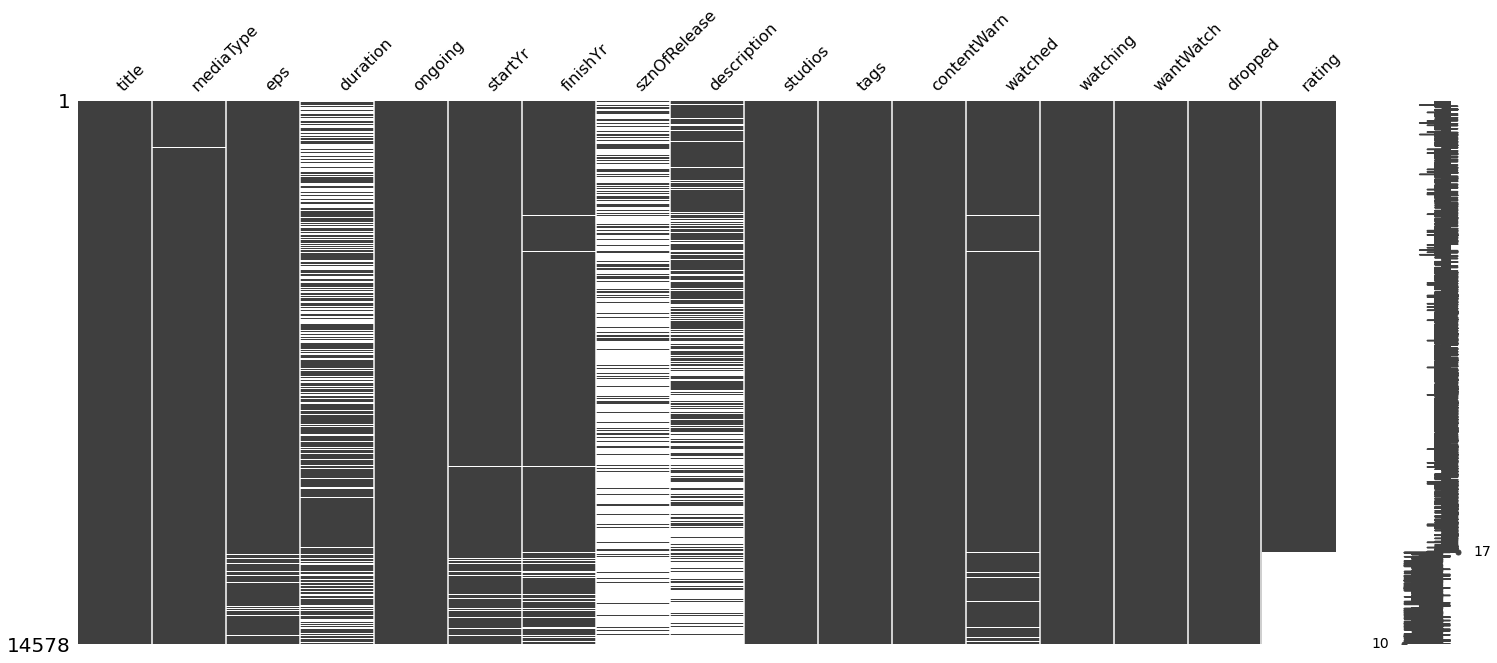

In [32]:
import missingno as missviz

missviz.matrix(pd.DataFrame(df2))

In [33]:
df2.drop('duration', axis = 1, inplace=True)
df2.drop('sznOfRelease', axis = 1, inplace=True)


In [34]:
df2 = df2.dropna()

In [35]:
df2.isna().sum()

title          0
mediaType      0
eps            0
ongoing        0
startYr        0
finishYr       0
description    0
studios        0
tags           0
contentWarn    0
watched        0
watching       0
wantWatch      0
dropped        0
rating         0
dtype: int64

In [36]:
df2.describe()

,eps,startYr,finishYr,watched,watching,wantWatch,dropped,rating
count,7517.000000,7517.000000,7517.000000,7517.000000,7517.000000,7517.000000,7517.000000,7517.000000
mean,15.017294,2004.954237,2005.244246,4365.681788,370.404816,1786.252494,235.120394,3.184030
std,36.195646,14.131728,14.042519,9449.537104,1416.793141,2702.243956,588.128420,0.778565
min,1.000000,1907.000000,1907.000000,0.000000,0.000000,0.000000,0.000000,0.844000
25%,1.000000,2000.000000,2000.000000,221.000000,9.000000,218.000000,10.000000,2.620000
50%,9.000000,2009.000000,2009.000000,993.000000,44.000000,772.000000,32.000000,3.258000
75%,13.000000,2015.000000,2015.000000,4049.000000,254.000000,2166.000000,211.000000,3.811000
max,1787.000000,2020.000000,2020.000000,161567.000000,69004.000000,28541.000000,19481.000000,4.702000


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7517 entries, 0 to 12717
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7517 non-null   object 
 1   mediaType    7517 non-null   object 
 2   eps          7517 non-null   float64
 3   ongoing      7517 non-null   bool   
 4   startYr      7517 non-null   float64
 5   finishYr     7517 non-null   float64
 6   description  7517 non-null   object 
 7   studios      7517 non-null   object 
 8   tags         7517 non-null   object 
 9   contentWarn  7517 non-null   object 
 10  watched      7517 non-null   float64
 11  watching     7517 non-null   int64  
 12  wantWatch    7517 non-null   int64  
 13  dropped      7517 non-null   int64  
 14  rating       7517 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(6)
memory usage: 888.2+ KB


In [38]:
df2['duration'] = df2['finishYr'] - df2['startYr']

<ipython-input-38-0ae699cdcf62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration'] = df2['finishYr'] - df2['startYr']


In [39]:
df2['age'] = 2021 - df2['startYr']

<ipython-input-39-57bfe94cf158>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = 2021 - df2['startYr']


In [40]:
df2['ep_ratio'] = df2['eps']/df2['age']

<ipython-input-40-0e5e78e5bd4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ep_ratio'] = df2['eps']/df2['age']


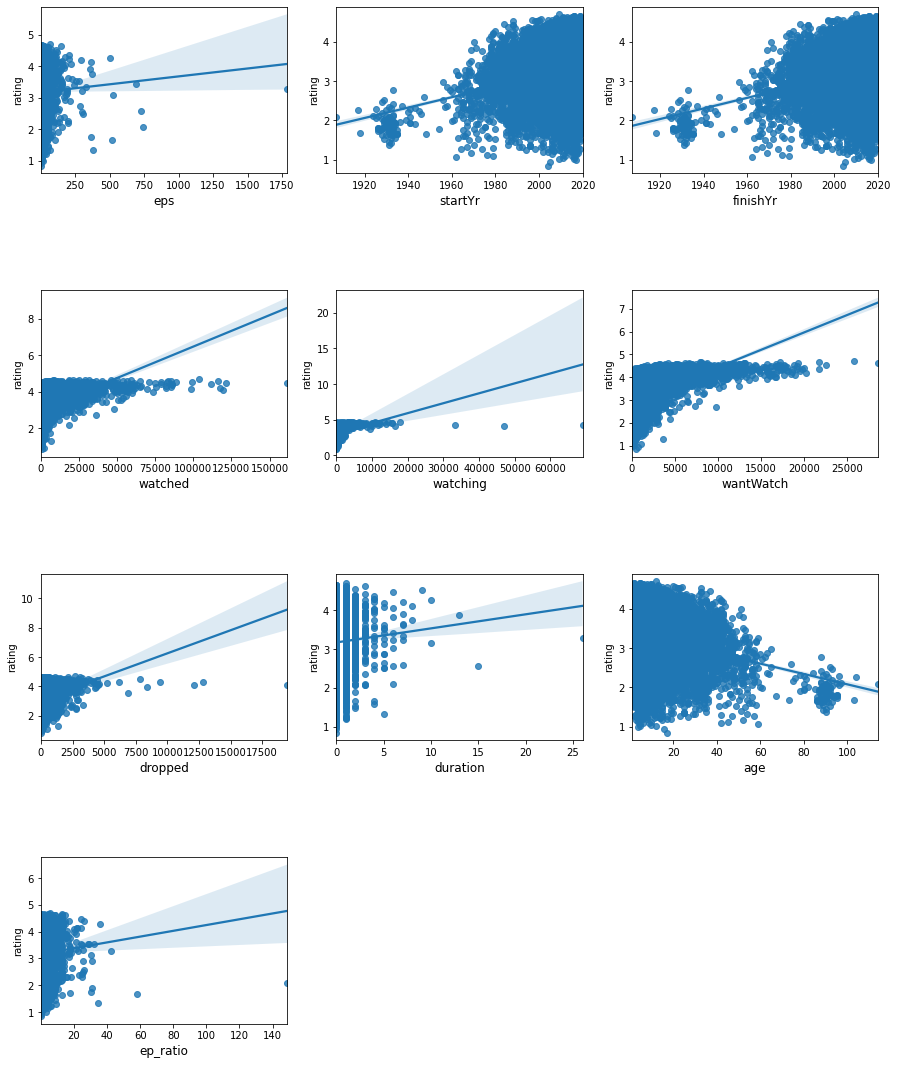

In [41]:
numlist = ['eps','startYr','finishYr','watched','watching','wantWatch',
           'dropped','duration','age','ep_ratio']

rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = 0.7)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="rating", data=df2)
    subCnt = subCnt + 1

plt.show()

In [42]:
df2 = df2[df2['eps']<300]
df2 = df2[df2['watched']<125000]
df2 = df2[df2['watching']<20000]
df2 = df2[df2['wantWatch']<24000]
df2 = df2[df2['dropped']<7500]
df2 = df2[df2['duration']<10]

In [43]:
df2.describe()

,eps,startYr,finishYr,watched,watching,wantWatch,dropped,rating,duration,age,ep_ratio
count,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000
mean,13.899933,2004.965977,2005.237625,4292.351167,343.615877,1772.737692,225.372382,3.183466,0.271648,16.034023,1.557823
std,21.753940,14.139231,14.055362,9035.003798,928.185519,2650.724353,476.966758,0.777814,0.633017,14.139231,2.639546
min,1.000000,1907.000000,1907.000000,0.000000,0.000000,0.000000,0.000000,0.844000,0.000000,1.000000,0.008772
25%,1.000000,2000.000000,2000.000000,222.000000,9.000000,219.000000,10.000000,2.620000,0.000000,6.000000,0.100000
50%,9.000000,2009.000000,2009.000000,994.000000,44.000000,773.000000,32.000000,3.257000,0.000000,12.000000,0.619048
75%,13.000000,2015.000000,2015.000000,4042.000000,254.000000,2163.000000,210.000000,3.810000,0.000000,21.000000,1.857143
max,296.000000,2020.000000,2020.000000,121565.000000,17730.000000,22537.000000,6915.000000,4.663000,9.000000,114.000000,32.333333


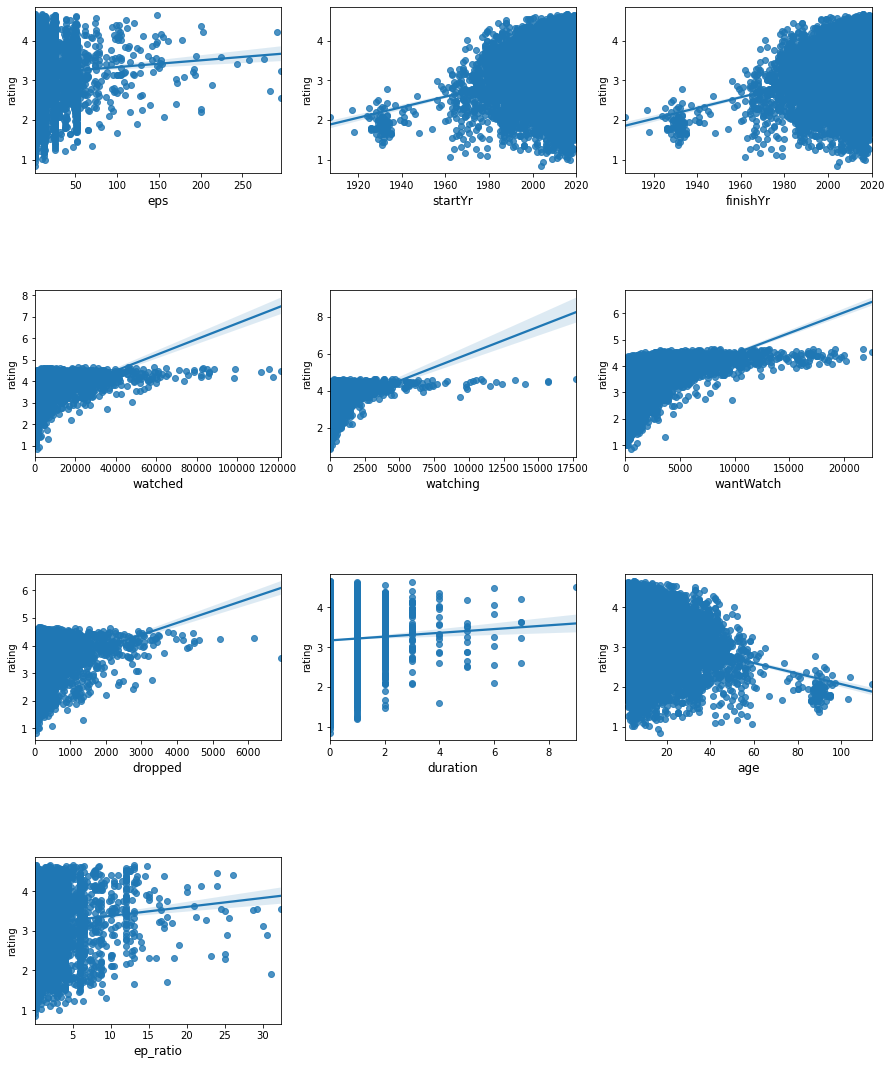

In [44]:

rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = 0.7)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="rating", data=df2)
    subCnt = subCnt + 1

plt.show()

<AxesSubplot:>

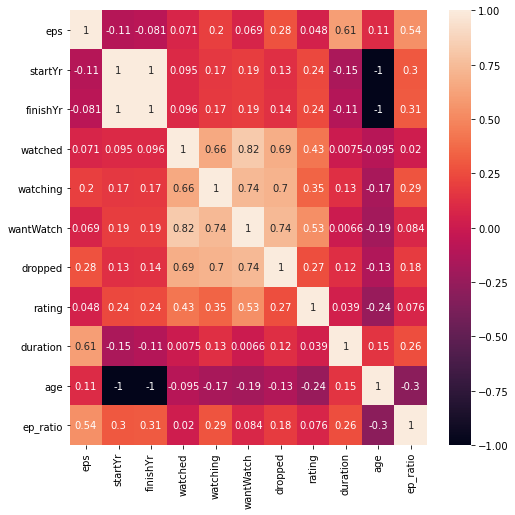

In [45]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap((df2.drop('ongoing',axis=1)).corr(),annot=True,vmin=-1, vmax=1,ax=ax)

In [46]:
cpy = df2.copy()

cpy = cpy[cpy['eps']<250]
cpy = cpy[cpy['startYr']>1950]
cpy = cpy[cpy['finishYr']>1950]
cpy = cpy[cpy['watched']<90000]
cpy = cpy[cpy['watching']<9000]
cpy = cpy[cpy['dropped']<4500]

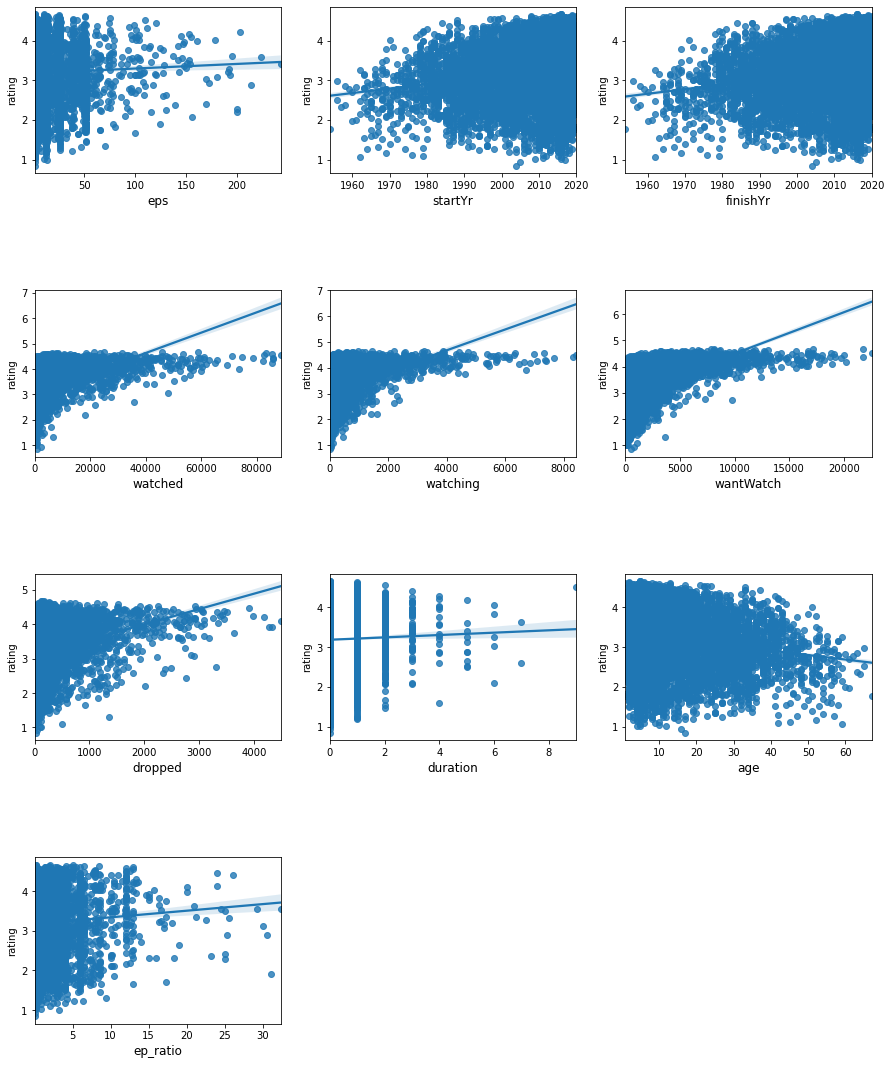

In [47]:
rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = 0.7)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="rating", data=cpy)
    subCnt = subCnt + 1

plt.show()

<AxesSubplot:>

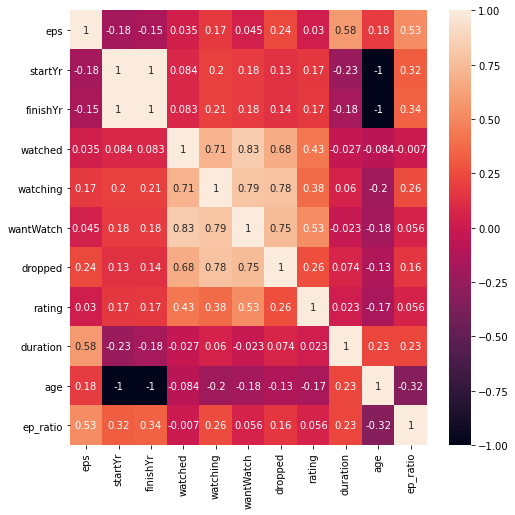

In [48]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap((cpy.drop('ongoing',axis=1)).corr(),annot=True,vmin=-1, vmax=1,ax=ax)

In [49]:
df2['mediaType'].unique()

array(['Movie', 'TV', 'TV Special', 'OVA', 'Web', 'DVD Special', 'Other',
       'Music Video'], dtype=object)

In [50]:
list_one_hot = ['mediaType']
encoder_OH = OneHotEncoder(handle_unknown='error',sparse=False)

fit_OH=encoder_OH.fit(df2[list_one_hot])
fit_data_OH=fit_OH.transform(df2[list_one_hot])

column_name_OH =fit_OH.get_feature_names(list_one_hot)
cols_OH = pd.DataFrame(fit_data_OH,columns=column_name_OH)
cols_OH.reset_index(drop=True, inplace=True)
cols_OH.nunique()

mediaType_DVD Special    2
mediaType_Movie          2
mediaType_Music Video    2
mediaType_OVA            2
mediaType_Other          2
mediaType_TV             2
mediaType_TV Special     2
mediaType_Web            2
dtype: int64

In [51]:
cols_OH

,mediaType_DVD Special,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7490,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7492,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7493,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
cols_OH.describe()

,mediaType_DVD Special,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web
count,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000
mean,0.027485,0.178519,0.017211,0.170647,0.023482,0.470047,0.044430,0.068179
std,0.163503,0.382975,0.130067,0.376225,0.151440,0.499135,0.206061,0.252069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df2.describe()

,eps,startYr,finishYr,watched,watching,wantWatch,dropped,rating,duration,age,ep_ratio
count,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000,7495.000000
mean,13.899933,2004.965977,2005.237625,4292.351167,343.615877,1772.737692,225.372382,3.183466,0.271648,16.034023,1.557823
std,21.753940,14.139231,14.055362,9035.003798,928.185519,2650.724353,476.966758,0.777814,0.633017,14.139231,2.639546
min,1.000000,1907.000000,1907.000000,0.000000,0.000000,0.000000,0.000000,0.844000,0.000000,1.000000,0.008772
25%,1.000000,2000.000000,2000.000000,222.000000,9.000000,219.000000,10.000000,2.620000,0.000000,6.000000,0.100000
50%,9.000000,2009.000000,2009.000000,994.000000,44.000000,773.000000,32.000000,3.257000,0.000000,12.000000,0.619048
75%,13.000000,2015.000000,2015.000000,4042.000000,254.000000,2163.000000,210.000000,3.810000,0.000000,21.000000,1.857143
max,296.000000,2020.000000,2020.000000,121565.000000,17730.000000,22537.000000,6915.000000,4.663000,9.000000,114.000000,32.333333


In [54]:
df2 = df2.reset_index()

In [55]:
xlist = ['startYr','finishYr','watched','watching','wantWatch','dropped','age']
x = pd.concat([df2[xlist],cols_OH],axis=1)
y = df2['rating']


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def model(x,y) :
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=1)
    regr = LinearRegression()
    regr.fit(xtrain,ytrain)
    print('score : ')
    print(regr.score(xtest,ytest))
    print('')
    ypred = regr.predict(xtest)
    print('MSE : ')
    print("{:e}".format(mean_squared_error(ytest, ypred)))

In [57]:
model(x,y)

score : 
0.3802742093186655

MSE : 
3.621379e-01


In [58]:
for i in numlist:
    print(i)
    print(df2[i].corr(df2['rating']))
    print(np.log(df2[i]).corr(df2['rating']))
    print(((df2[i])**0.5).corr(df2['rating']))
    print(np.power(df2[i],1/5).corr(df2['rating']))
    print('')

eps
0.047796462379646916
0.09365986228861638
0.07577040226207345
0.08865083576728357

startYr
0.24105432557209552
0.24154472609252323
0.24130109096106
0.2414476519719425

finishYr
0.24423511493707542
0.24470787331893157
0.24447316208843073
0.24461439352384567

watched
0.42538086968372346
nan
0.5739365054881418
0.6320007871515808

watching
0.34758776036109407
nan
0.49000840774571697
0.5662448477160644

wantWatch
0.5327366244224733
nan
0.6341147744047579
0.6639761863149246

dropped
0.26553625063355046
nan
0.3363006871679928
0.3926491977878422

duration
0.03868830428773432
nan
0.035284156687965244
0.032128940424865145

age
-0.24105432557209547
-0.17318085174711373
-0.2131794189917223
-0.18996256517726767

ep_ratio
0.07644355197068212
0.16592682317105023
0.11523524202144997
0.14490949314553003



D:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
df2['eps'] = np.log(df2['eps'])
df2['watched'] = np.power(df2['watched'],1/5)
df2['watching'] = np.power(df2['watching'],1/5)
df2['wantWatch'] = np.power(df2['wantWatch'],1/5)
df2['dropped'] = np.power(df2['dropped'],1/5)
df2['ep_ratio'] = np.log(df2['ep_ratio'])

In [60]:
xlist = ['startYr','finishYr','watched','watching','wantWatch','dropped','eps','age','ep_ratio']

x = pd.concat([df2[xlist],cols_OH],axis=1)
y = df2['rating']

model(x,y)

score : 
0.607072896809687

MSE : 
2.296076e-01


In [61]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dfscale = scale.fit_transform(df2[xlist])

cols_scaled = pd.DataFrame(dfscale,columns=xlist)
cols_scaled.reset_index(drop=True, inplace=True)
df2[xlist] = cols_scaled
df2[xlist]

,startYr,finishYr,watched,watching,wantWatch,dropped,eps,age,ep_ratio
0,0.780436,0.765764,2.929528,1.745179,2.996060,0.378984,-1.121888,-0.780436,-0.484043
1,0.780436,0.765764,2.662168,1.428869,2.707481,0.412815,-1.121888,-0.780436,-0.484043
2,0.780436,0.765764,2.066626,2.071377,1.876913,0.543937,0.432846,-0.780436,0.835329
3,0.992625,0.979220,1.915425,2.407788,1.849012,0.567468,0.432846,-0.992625,1.360360
4,0.992625,0.979220,2.192040,3.648091,2.400528,1.375708,1.078019,-0.992625,1.907864
...,...,...,...,...,...,...,...,...,...
7490,0.851166,0.836916,-1.099282,-0.559787,-0.952821,0.295953,0.609997,-0.851166,1.113523
7491,0.002406,-0.016907,0.302700,-0.468534,-0.038805,-0.176319,-1.121888,-0.002406,-1.150524
7492,-0.068324,-0.088059,-0.162052,-0.652461,-0.313663,-0.313118,-1.121888,0.068324,-1.185262
7493,0.851166,0.836916,-1.506280,-1.070835,-1.526050,-1.284388,-1.121888,-0.851166,-0.356183


In [62]:
x = pd.concat([cols_scaled,cols_OH],axis=1)
y = df2['rating']

model(x,y)

score : 
0.6062965110217506

MSE : 
2.300613e-01


In [63]:
df2

,index,title,mediaType,eps,ongoing,startYr,finishYr,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,duration,age,ep_ratio
0,1,your name.,Movie,-1.121888,False,0.780436,0.765764,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],2.929528,1.745179,2.996060,0.378984,4.663,0.0,-0.780436,-0.484043
1,2,A Silent Voice,Movie,-1.121888,False,0.780436,0.765764,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",2.662168,1.428869,2.707481,0.412815,4.661,0.0,-0.780436,-0.484043
2,3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,0.432846,False,0.780436,0.765764,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],2.066626,2.071377,1.876913,0.543937,4.660,0.0,-0.780436,0.835329
3,4,Attack on Titan 3rd Season: Part II,TV,0.432846,False,0.992625,0.979220,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",1.915425,2.407788,1.849012,0.567468,4.650,0.0,-0.992625,1.360360
4,5,Demon Slayer: Kimetsu no Yaiba,TV,1.078019,False,0.992625,0.979220,"Bloodthirsty demons lurk in the woods, and nob...",['ufotable'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",['Violence'],2.192040,3.648091,2.400528,1.375708,4.647,0.0,-0.992625,1.907864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,12100,Forest Fairy Five,TV,0.609997,False,0.851166,0.836916,"A beautiful nation, prospering since ancient t...",[],"['Fantasy', 'Chibi', 'Family Friendly', 'Short...",[],-1.099282,-0.559787,-0.952821,0.295953,1.002,0.0,-0.851166,1.113523
7491,12105,Mars of Destruction,OVA,-1.121888,False,0.002406,-0.016907,"In the year 2010 the Mars Exploration Vessel, ...",['Wao World'],"['Action', 'Sci Fi', 'Aliens', 'Military', 'Sh...",['Explicit Violence'],0.302700,-0.468534,-0.038805,-0.176319,0.931,0.0,-0.002406,-1.150524
7492,12109,Tenkuu Danzai Skelter Heaven,OVA,-1.121888,False,-0.068324,-0.088059,Hovering above the streets of a futuristic Tok...,['Idea Factory'],"['Action', 'Drama', 'Mecha', 'Sci Fi', 'Shorts...",[],-0.162052,-0.652461,-0.313663,-0.313118,0.844,0.0,0.068324,-1.185262
7493,12705,Bonobono: Uchuu kara Kita Tomodachi,Movie,-1.121888,False,0.851166,0.836916,The anime will feature an original story where...,['Eiken'],"['Adventure', 'Animal Protagonists', 'Non-Huma...",[],-1.506280,-1.070835,-1.526050,-1.284388,2.473,0.0,-0.851166,-0.356183


In [64]:
df2['description'].describe()

count                                                  7495
unique                                                 7434
top       In 19th century Belgium, in the Flanders count...
freq                                                      3
Name: description, dtype: object

In [65]:
df2['studios'].describe()

count     7495
unique     724
top         []
freq       830
Name: studios, dtype: object

In [66]:
df2['tags'].describe()

count     7495
unique    6078
top         []
freq        33
Name: tags, dtype: object

In [67]:
df2['contentWarn'].describe()

count     7495
unique     170
top         []
freq      6325
Name: contentWarn, dtype: object

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [69]:
df2['tags'].str.lower()
vectorizer = TfidfVectorizer(min_df=0.001,max_df=0.9)
X1 = vectorizer.fit_transform(df2['tags']) 

In [70]:
print(vectorizer.get_feature_names())

['15th', '16th', '19th', 'abstract', 'acting', 'action', 'adult', 'adventure', 'africa', 'afterlife', 'age', 'agriculture', 'ai', 'aliens', 'all', 'america', 'amnesia', 'amusement', 'an', 'ancient', 'and', 'androids', 'angels', 'animal', 'animation', 'animators', 'anime', 'animeism', 'another', 'anthropomorphic', 'apartment', 'apocalypse', 'apocalyptic', 'appearance', 'apprenticeship', 'archery', 'arranged', 'art', 'arts', 'assassins', 'astronauts', 'astronomy', 'attract', 'aviation', 'baseball', 'based', 'basketball', 'battles', 'bears', 'bender', 'beverage', 'birds', 'bl', 'black', 'blackmail', 'board', 'boarding', 'body', 'bodyguards', 'book', 'borderline', 'boss', 'bounty', 'boxing', 'boys', 'breaking', 'brother', 'buddhism', 'butlers', 'cafe', 'card', 'cars', 'cartoon', 'cats', 'century', 'cg', 'change', 'characteristics', 'characters', 'cheats', 'chibi', 'childcare', 'childhood', 'china', 'chinese', 'christianity', 'christmas', 'classic', 'classical', 'club', 'co', 'cohabitation'

In [71]:
model(X1,df2['rating'])

score : 
0.39778583407730383

MSE : 
3.519049e-01


In [72]:
df2['description'].str.lower()
vectorizer2 = TfidfVectorizer(min_df=0.01,max_df=0.9,stop_words='english')
X2 = vectorizer2.fit_transform(df2['description']) 

In [73]:
print(vectorizer2.get_feature_names())

['abandoned', 'abilities', 'ability', 'able', 'academy', 'accident', 'accidentally', 'action', 'actually', 'adventure', 'adventures', 'age', 'ago', 'air', 'alien', 'aliens', 'alive', 'alongside', 'ancient', 'animals', 'anime', 'appear', 'appears', 'aren', 'army', 'arrival', 'arrives', 'attack', 'attacked', 'attacks', 'attempt', 'attempts', 'away', 'bad', 'band', 'battle', 'battles', 'beautiful', 'beauty', 'begin', 'beginning', 'begins', 'beings', 'best', 'better', 'big', 'bizarre', 'black', 'blood', 'blue', 'body', 'born', 'boy', 'boys', 'break', 'bring', 'brings', 'brother', 'brought', 'called', 'captain', 'capture', 'care', 'case', 'cat', 'catch', 'caught', 'cause', 'causing', 'century', 'certain', 'challenge', 'challenges', 'chan', 'chance', 'change', 'changed', 'changes', 'chaos', 'characters', 'child', 'childhood', 'children', 'chosen', 'city', 'class', 'classmate', 'classmates', 'close', 'club', 'combat', 'come', 'comes', 'coming', 'companions', 'company', 'competition', 'complet

In [74]:
model(X2,df2['rating'])

score : 
0.08930842120944993

MSE : 
5.321642e-01


In [75]:
df2['contentWarn'].str.lower()
vectorizer3 = TfidfVectorizer()
X3 = vectorizer3.fit_transform(df2['contentWarn']) 

In [76]:
print(vectorizer3.get_feature_names())

['abuse', 'animal', 'bullying', 'cannibalism', 'content', 'domestic', 'drug', 'emotional', 'explicit', 'harm', 'incest', 'mature', 'nudity', 'physical', 'prostitution', 'self', 'sex', 'sexual', 'suicide', 'themes', 'use', 'violence']


In [77]:
model(X3,df2['rating'])

score : 
0.020297127184769392

MSE : 
5.724911e-01


In [78]:
df2['studios'].str.lower()
vectorizer4 = TfidfVectorizer()
X4 = vectorizer4.fit_transform(df2['studios']) 

In [79]:
print(vectorizer4.get_feature_names())

['10gauge', '21', '3hz', '3xcube', '5th', '80', '88', 'academy', 'acc', 'acca', 'actas', 'agent', 'aic', 'ajia', 'albacrow', 'amber', 'an', 'anchor', 'angle', 'anima', 'animal', 'animation', 'animations', 'anime', 'animedia', 'anpro', 'answer', 'ao', 'arcs', 'arcturus', 'ark', 'arms', 'artland', 'artmic', 'arts', 'arvo', 'asahi', 'ascension', 'ashi', 'asread', 'assez', 'asura', 'aubec', 'avenue', 'axsiz', 'baba', 'bakken', 'bang', 'barnum', 'beat', 'bee', 'bestack', 'beyond', 'bibury', 'big', 'bit', 'blade', 'blanc', 'blaze', 'bn', 'bogey', 'bones', 'bouncy', 'box', 'bridge', 'broccoli', 'buemon', 'bugyousho', 'build', 'bus', 'c2c', 'candy', 'cartoon', 'casio', 'cat', 'cente', 'chaos', 'charaction', 'chaser', 'children', 'chizu', 'circus', 'citrus', 'classic', 'cloverworks', 'cmay', 'co', 'coa', 'colorido', 'comet', 'comix', 'company', 'connect', 'corporation', 'craft', 'craftar', 'create', 'creations', 'creative', 'creators', 'crocodile', 'cucuri', 'cyberconnect2', 'cyclone', 'cygames

In [80]:
model(X4,df2['rating'])

score : 
0.2161271292956637

MSE : 
4.580575e-01


In [81]:
X = hstack([X1,X2,X3,X4])
x=hstack((X,cols_scaled,cols_OH))

In [82]:
model(x,y)

score : 
0.663577682183293

MSE : 
1.965890e-01


In [83]:
X = hstack([X1,X4])
x=hstack((X,cols_scaled,cols_OH))

In [84]:
model(x,y)

score : 
0.692859001638465

MSE : 
1.794784e-01


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
cvectorizer = CountVectorizer()
V1 = cvectorizer.fit_transform(df2['tags']) 
model(V1,df2['rating'])

score : 
0.3741524634311557

MSE : 
3.657151e-01


In [87]:
cvectorizer2 = CountVectorizer(min_df=0.01,stop_words='english')
V2 = cvectorizer2.fit_transform(df2['description'])
model(V2,df2['rating'])

score : 
0.06666502204194236

MSE : 
5.453959e-01


In [88]:
cvectorizer3 = CountVectorizer()
V3 = cvectorizer3.fit_transform(df2['contentWarn'])
model(V3,df2['rating'])

score : 
0.021301253082072757

MSE : 
5.719043e-01


In [89]:
cvectorizer4 = CountVectorizer()
V4 = cvectorizer4.fit_transform(df2['studios'])
model(V4,df2['rating'])



score : 
0.18592308450158024

MSE : 
4.757073e-01


In [90]:
V = hstack([V1,V4])
x=hstack((V,cols_scaled,cols_OH))
model(x,y)

score : 
0.6792414573839833

MSE : 
1.874358e-01
